<a href="https://colab.research.google.com/github/Alexandremsn/desafio_alura_data_science/blob/main/DesafioSemana2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Atividades:

Analisar a variável target: Churn

Visualizar a distribuição da variável target: Churn

Criar visualizações relevantes em relação ao Churn

Analisar a correlação das variáveis

Testar diferentes tipos de gráficos


### Analisar a variável target: Churn;


Importando as Bibiotecas

In [ ]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.4 MB 7.0 MB/s 
     |████████████████████████████████| 280 kB 56.9 MB/s 
     |████████████████████████████████| 965 kB 41.5 MB/s 
     |████████████████████████████████| 295 kB 62.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.style as style

Importando os dados

In [ ]:
dataset = pd.read_csv('https://github.com/Alexandremsn/desafio_alura_data_science/raw/main/semana1/dados_normalizados_churn.csv')   

varificando se a importação foi bem sucedida

In [ ]:
dataset.head()

,ID_Cliente,Churn,Genero,Maior_65,Parceiro,Dependentes,Meses_de_Contrato,Serviço_telefone,Mais_de_uma_linha,Serviço_Internet,...,Proteção_de_dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Conta_Online,Metodo_de_Pagamento,Gasto_Diario,Gasto_Mensal,Gasto_Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


importação, bem sucedida, podemos dar início a análise dos dados para buscarmos correlações entre as variáveis.

###Visualizar a distribuição da variável target: Churn

In [ ]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
dataset['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

geramos um quantitativo e um gráfico para vizualizar melhor a proporção.

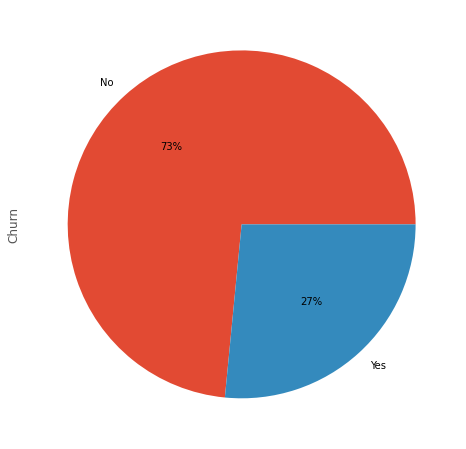

In [ ]:
dataset['Churn'].value_counts(normalize = True).plot(
    kind='pie', y='Churn', autopct='%1.0f%%',figsize = (8,8))



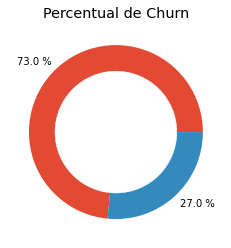

<Figure size 432x288 with 0 Axes>

In [ ]:

circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(dataset['Churn'].value_counts(normalize = True), labels =(str((dataset['Churn'].value_counts(normalize = True)[0].round(2)*100))+' %',str((dataset['Churn'].value_counts(normalize = True)[1].round(2)*100))+' %'))
plt.title(label = 'Percentual de Churn')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()
plt.savefig('distibuicao.png', dpi=150)

Testando uma outra opção de gráfico e salvando este visual.

vamos definir uma função simples para plotar os dados para visualizarmos o comportamento de algumas variáveis.

In [ ]:
def plotar_histogramas(dados,coluna,nome_fig):
  Yes = 'Yes'
  No = 'No'
  style.use('ggplot')
  
  fig, ax = plt.subplots(1,2,figsize=(15,10))
  
  sns.histplot(data=dados.query('Churn == @Yes')[coluna], ax=ax[0]).set(title = 'Churn YES', ylabel = 'Quantitativo')

  sns.histplot(data=dados.query('Churn == @No')[coluna], ax=ax[1]).set(title = 'Churn NO', ylabel = 'Quantitativo')
 

  fig.savefig(nome_fig, dpi = 150)
  fig.show()



Uma função para gerar histogramas simples para comprar a influência de nossa variável alvo nas outras variáveis analisadas a função também salva o gráfico como figura.

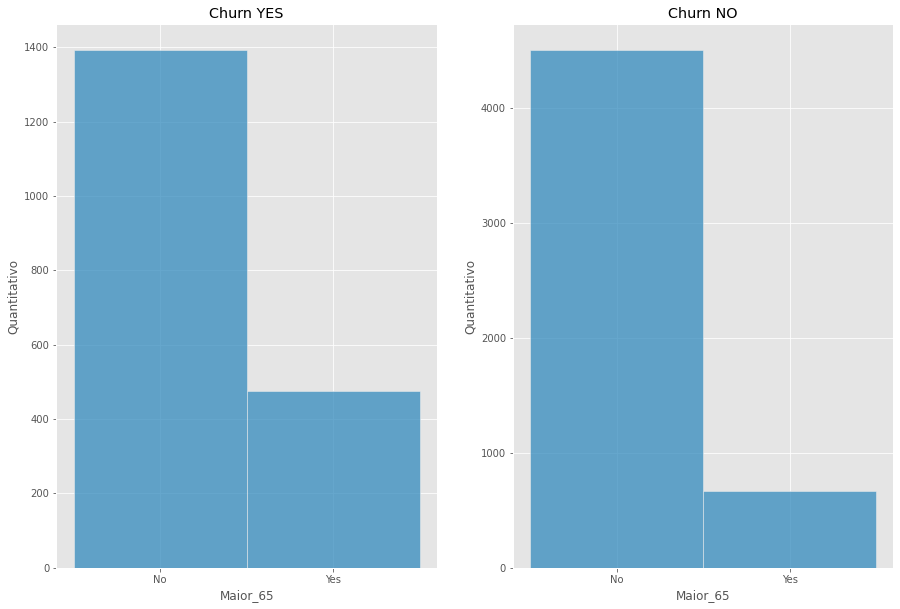

In [ ]:
plotar_histogramas(dataset,'Maior_65', nome_fig = 'comparativo maior 65.png')

esta variável parece ter pouca correlação, pois os gráficos exibem padrões parecidos, o que seria surpriendente até certo ponto, pois o cliente senior tende a ter um padão de consumo diferente, mas isso não influência sua permanência ou não na empresa.

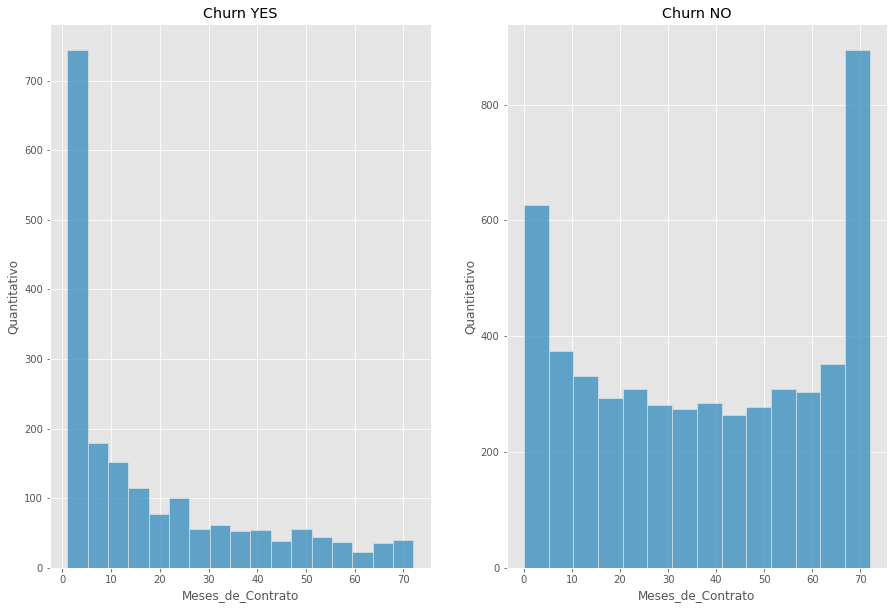

In [ ]:
plotar_histogramas(dataset,'Meses_de_Contrato', nome_fig = 'comparativo meses contrato.png')

esta variável possui algum grau de correlação, e o mais surpriendente mostra uma tendência de que a empresa está perdendo crientes novos, vemos um pico claro de abandono da empresa na maior parte pelo grupo com 0 a 5 meses de contrato, mas parece ser mais fácil reter clientes depois de um certo período de contrato.

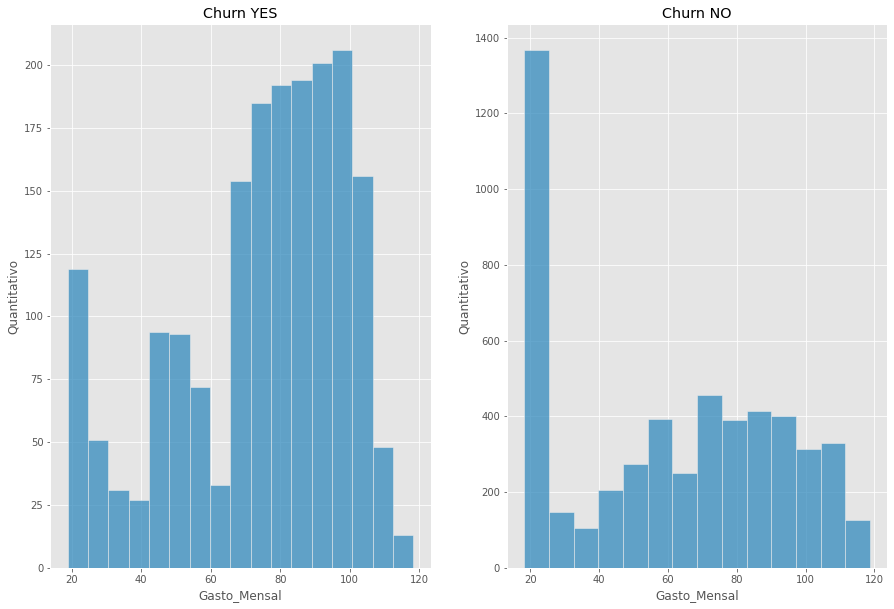

In [ ]:
plotar_histogramas(dataset,'Gasto_Mensal', nome_fig = 'comparativo gasto mensal.png')

vimos para estas variáveis uma proporção diferente dos gráficos o que pode indicar algum grau de correlação, os grupos mais fiéis são os que gastam menos pois temos um pico de abandono da empresa por cliente na faixa de 80 a 100 reais de gasto mensal.

vamos gerar um gráfico de mapa de calor para verificar qual grau de correlação entre todas as variáveis


###Analisar a correlação das variáveis

In [ ]:
from dython.nominal import associations

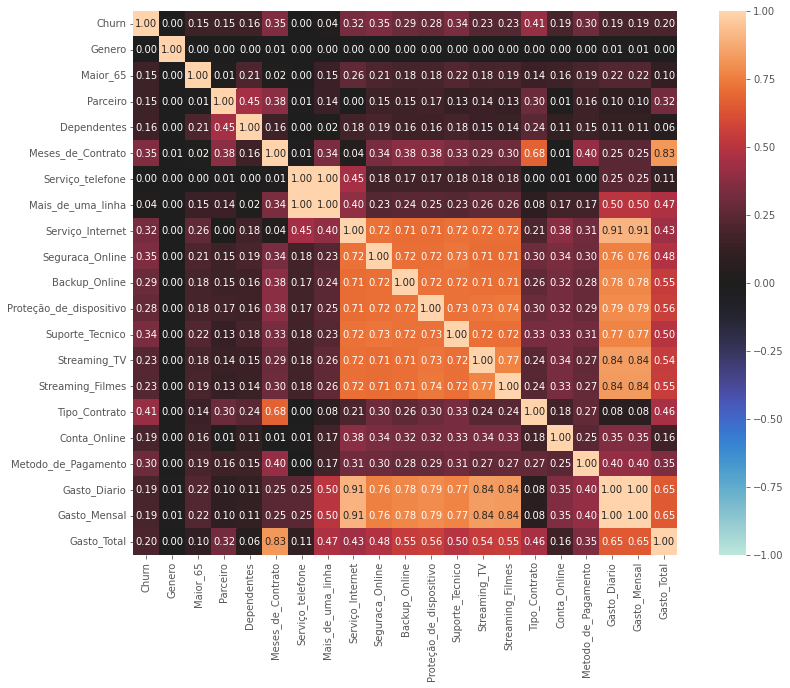

In [ ]:
figheat, correlation_heat_map = plt.subplots(figsize=(15, 10))
associations(dataset, figsize=(15,10), hide_columns = 'ID_Cliente', hide_rows = 'ID_Cliente', ax = correlation_heat_map)

figheat.savefig('heat_map.png')


agora vamos relacionar quais variáveis posssuem mais coreelação:
genero não possui qualquer correlação com o abandono de clientes.
dependentes, parceiro, senioridade, ter ou não telefone não parece influenciar em nada.

mas ter internet, e seus serviços associados são fatores que apresentam entre 28 a 34 por centro de correlação. a variável com mais correlação é o tipo de contrato.

vamos prestar atenção a seguir quando gerar um gráfico golbal como se comportam os gráficos percentuais, 
as variáveis abaixo de 0,19 vamos despresar.

vamos agora analizar os perfis de clientes com churn sim e não de forma agrupada para verificar como estes perfis são diferentes

###criação de um compararivo entre clientes com e sem churn;

vamos usar as variáveis binárias, assim o serviço de internet vamos tranforma-la em binária considerando quem tem fibra e dsl como sim e quem não tem como não.


In [ ]:
dataset['Possui_Internet'] = dataset['Serviço_Internet'].map(lambda x: 'No' if x == 'No' else 'Yes' )
dataset['Possui_Internet'].value_counts()

Yes    5517
No     1526
Name: Possui_Internet, dtype: int64

agora vamos contar todas as categorias e gerar um gráfico comparativo com a função abaixo.

In [ ]:
colunas_perfil = ['Genero', 'Maior_65', 'Parceiro', 'Dependentes', 'Serviço_telefone', 'Mais_de_uma_linha', 'Seguraca_Online',
                  'Backup_Online', 'Proteção_de_dispositivo', 'Suporte_Tecnico', 
                          'Streaming_TV', 'Streaming_Filmes', 'Conta_Online', 'Possui_Internet']
rotulos_perfil = ['Gênero', 'Sênior', 'Parceiro', 'Dependentes', 'Serviço de Telefone', 
                        'Múltiplas Linhas', 'Segurança Online', 'Backup Online',
                        'Proteção de Dispositivo', 'Suporte Técnicno', 'Streaming de TV', 'Streaming de Filmes',
                        'Fatura Online', 'Serviço de Internet']

In [ ]:
def contagem_graf(dataset, titulo_grafico, nome_fig):
  lista_rotulo = []
  lista_yes = []
  lista_no = []
  lista_labelno = []
  lista_labelyes = []
  ### esta função se baseia em listas temos as listas que vão gerar os rótulos de cada gráfico e as listas com valores, depois isso será exportado
  ###como dataframe para gerar os gráfico
  for i in range(len(colunas_perfil)):
    lista_rotulo.append(rotulos_perfil[i])
    ##como na categoria genero temos masculino e feminino e nas outras variáveis sim e não tivemos que dar um tratamento especial a esta variável
    ##pois os rótulos devem ser diferentes para esta variável
    if colunas_perfil[i] == 'Genero':
      dict_values = dict(dataset[colunas_perfil[i]].value_counts(normalize = True))['Male']
      lista_yes.append(round(dict_values,4))
      lista_no.append(round(1-dict_values,4))
      ###usamos um dict para evitar um possível erro de para um váriavel o sim ser o primeiro elemento e para outra o não, assim ele vai buscar sempre pela key
      ### desejada evitando o uso de posicionais que poderiam ocasionar erros.
      rotulo_no = 'FEMALE: '+ str(round(round(1-dict_values,4)*100,2)) + ' %'
      lista_labelno.append(rotulo_no)
      rotulo_yes = 'MALE: '+ str(round(round(dict_values,4)*100,2)) + ' %'
      lista_labelyes.append(rotulo_yes)
    else:
      dict_values = dict(dataset[colunas_perfil[i]].value_counts(normalize = True))['Yes']
      lista_yes.append(round(dict_values,4))
      lista_no.append(round(1-dict_values,4))
      ## gerando um string como rótulo pegando o número e reescrevendo como percentual antecedido do nome do valor a ser informado
      rotulo_no = 'NO: '+ str(round(round(1-dict_values,4)*100,2)) + ' %'
      lista_labelno.append(rotulo_no)
      rotulo_yes = 'YES: '+ str(round(round(dict_values,4)*100,2)) + ' %'
      lista_labelyes.append(rotulo_yes)
  framegraf = pd.DataFrame(lista_yes, columns = ['YES'])
  framegraf['NO'] = lista_no
  framegraf['TOTAL'] = 1
  framegraf['CARACT'] = lista_rotulo
  #criando um dataframe com as listas para poder plotar o gráfico
  fig, ax = plt.subplots(figsize=(20,20))

  ax = sns.barplot(x="TOTAL", y = 'CARACT'  ,data=framegraf, label=False, color="#164980")
  #gerando a carra cheia no fundo do gráfico
  ax = sns.barplot(x='YES', y="CARACT", data=framegraf, label=False, color="#81d712")
  # gerando a barra verde na frente do gráfico
  ax.set(xlabel="PERCENTUAL", ylabel="CARACTETÍSTICA", title= titulo_grafico)
  for i in range(len(lista_labelyes)):
    ax.text(0.02,i,lista_labelyes[i], fontsize = 14, color = 'white')
    ax.text(0.99,i,lista_labelno[i], fontsize = 14, color = 'white', horizontalalignment = 'right')
    #aqui aplicamos os rótulos gerados pela função acima no gráfico
  fig.savefig(nome_fig, dpi=150)
  # salvando a figura

aqui selecionamos a varivél chun = não para gerar um gráfico geral pelas características selecionadas e posteriormente geramos um com churn sim para termos um comprarativo de perfil de cliente.

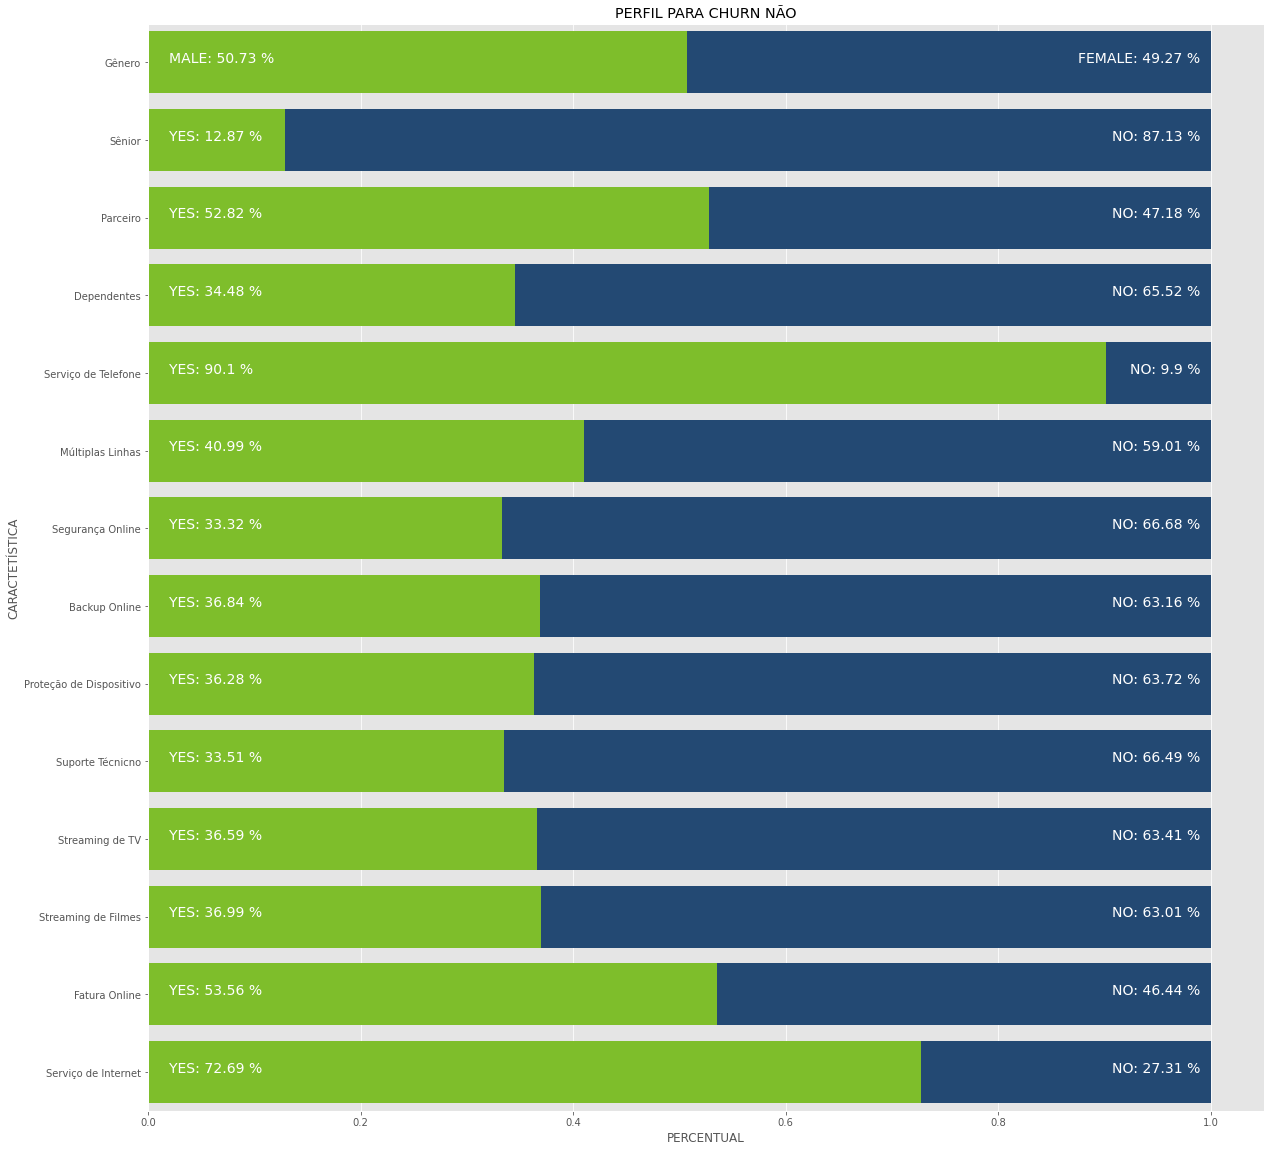

In [ ]:
contagem_graf(dataset[dataset['Churn']== 'No'], 'PERFIL PARA CHURN NÃO', nome_fig = 'churn_yes.png')

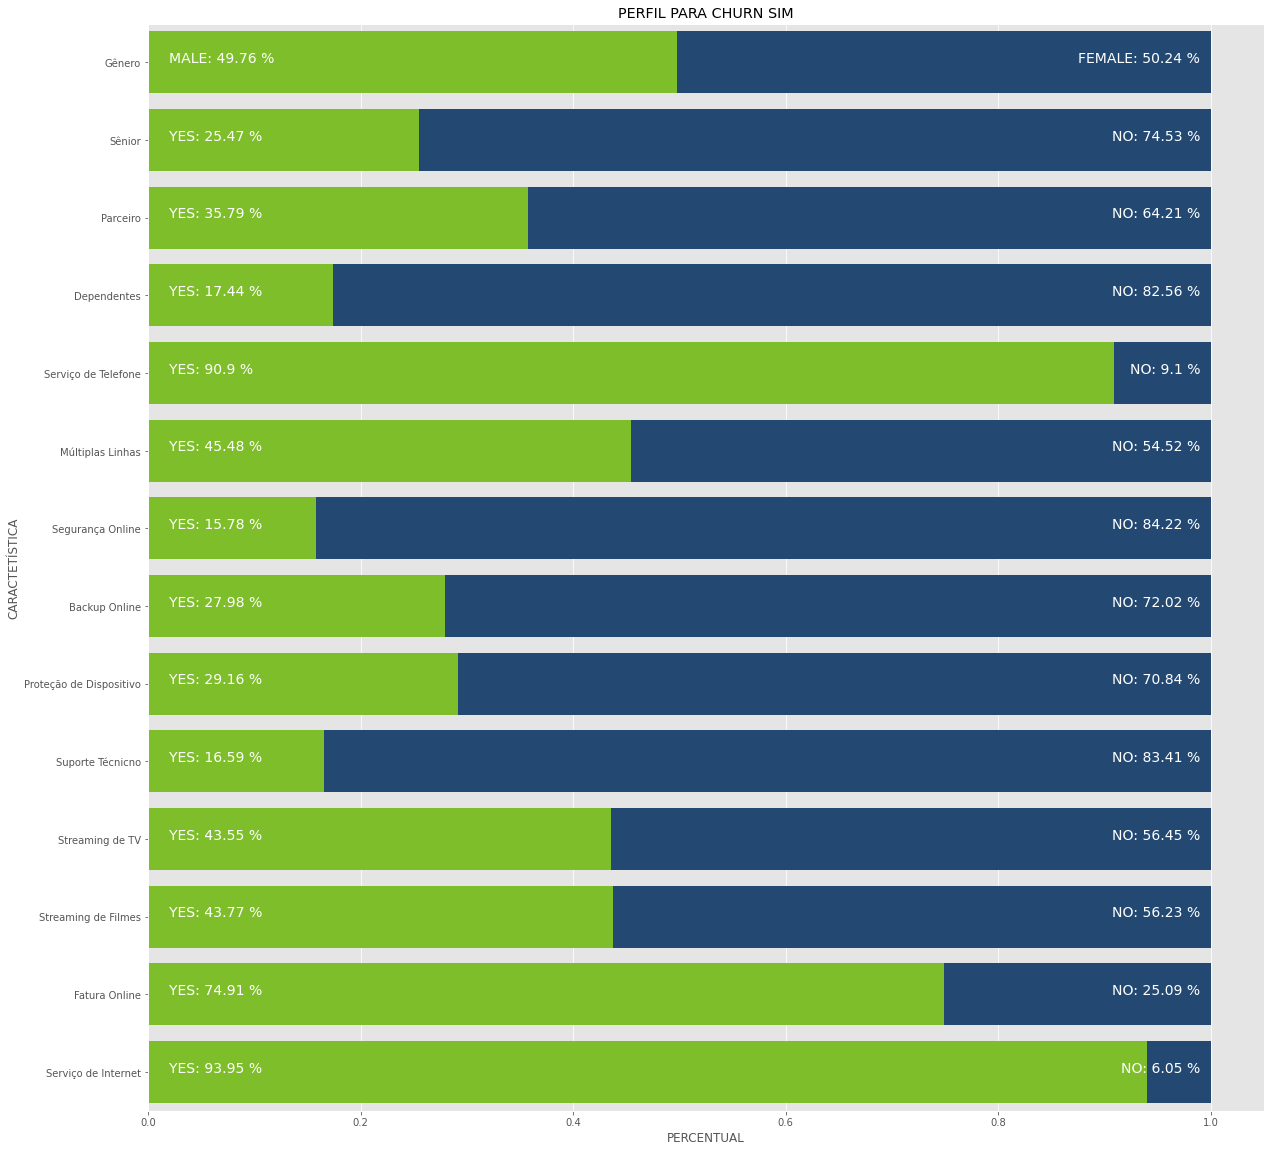

In [ ]:
contagem_graf(dataset[dataset['Churn']== 'Yes'], 'PERFIL PARA CHURN SIM', nome_fig = 'churn_no.png')

vamos gerar o gráfico comparativo para a nova variável e para a variável tipo de contrato que possui maior correlação.
ao visualizar o gráfico podemos ver a influência da variável alvo no variável plotada.

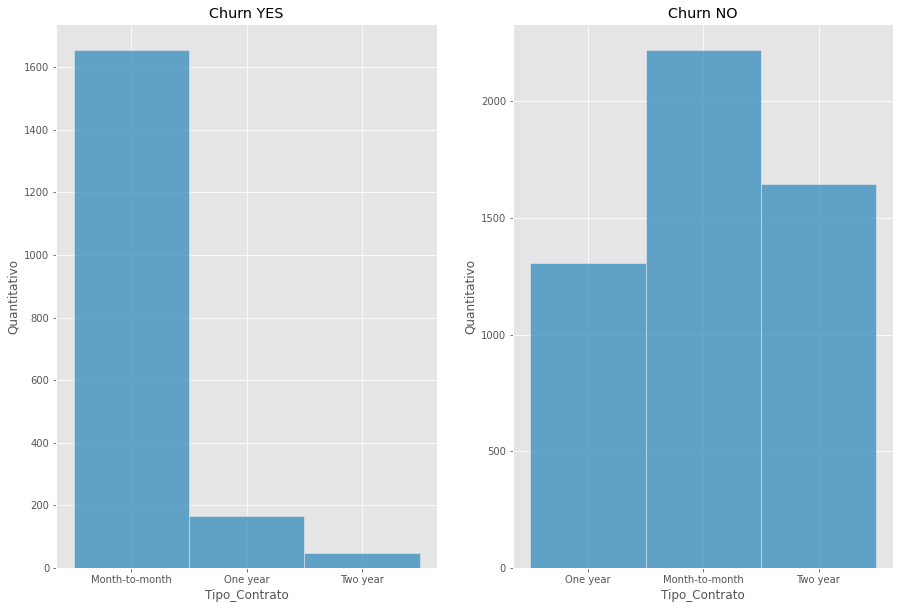

In [ ]:
plotar_histogramas(dataset,'Tipo_Contrato', nome_fig = 'comparativo tipo contrato.png')

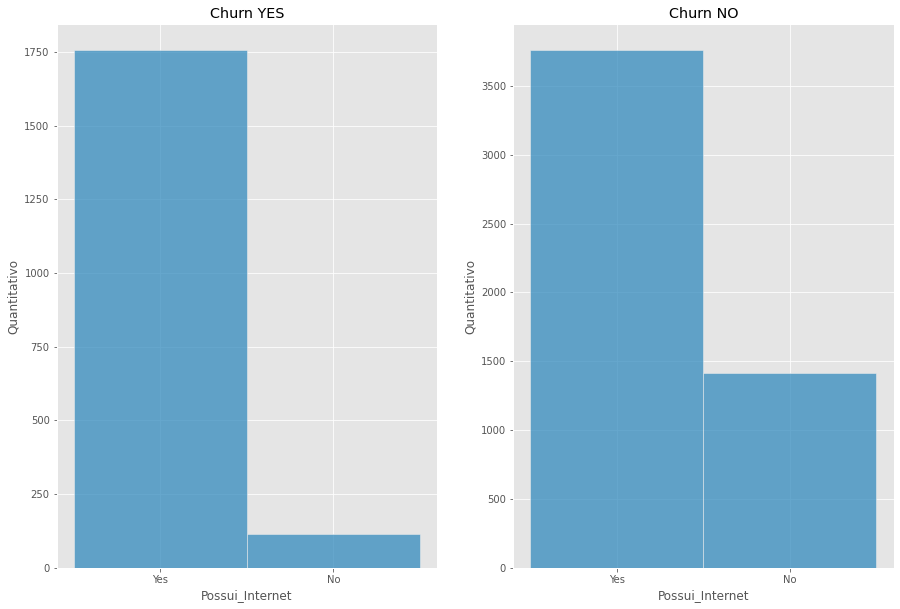

In [ ]:
plotar_histogramas(dataset,'Possui_Internet', nome_fig = 'comparativo internet.png')

Visualizando os dados podemos inferir:

 que um dos pontos que mais contruibui para a dimunuição do churn é o tipo de contrato contratos com fidelidade geram um abandono menor que contratos sem fidelidade pessoas com gasto mensal baixo tendem a permanescer na empresa.
porém um fator que merece atenção é no caso de clientes sem internet os clientes sem internet parecem mais fiéis comparando os gráficos, mas o fato de quase toda a gama de serviços oferecidos ser dependente de internet, levanta a preocupação que este cliente fiel possa desaparecer com o tempo. 
os serviços de suporte e backup e correlatos estão mais presentes nos clientes que permanescem na empresa, assim estes serviços parecem estar sendo bem recebidos pelos usuários e agregando valor a percepção do cliente.
